# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [42]:
%matplotlib inline
# import numpy and pandas
import pandas as pd 
import numpy as np


# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [43]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [44]:
# Your code here:
fifa.head()


,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [45]:
# Your code here:
fifa['ValueNumeric']=fifa.Value.str.extract(r'(\d+\.\d+|\d+)').astype('float')

fifa.head()


,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110.5
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118.5
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102.0


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [46]:
# Your code here:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo_lm=smf.ols(formula="ValueNumeric ~C(fifa['Preferred Foot']) + C(Position)", data=fifa).fit()

table = sm.stats.anova_lm(modelo_lm, typ=2)
print(table)

                                 sum_sq       df         F        PR(>F)
C(fifa['Preferred Foot'])  7.292211e+04      1.0  0.871795  3.504713e-01
C(Position)                8.767522e+06     26.0  4.031426  2.192419e-11
Residual                   1.515581e+09  18119.0       NaN           NaN


What is your conclusion from this ANOVA?

In [50]:
# Your conclusions here:
# given the result of F and PR(>F) we can say that "position" is statistically significant, so 
# in this case we reject the null hypothesis. Meantime, "Preferred Foot" is not significant and 
# we can Not reject Ho (Ho: "Preferred Foot" has no effect in "value").

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [51]:
# Your code here:
modelo_lm1=smf.ols(formula="ValueNumeric ~C(Nationality) ", data=fifa).fit()

table = sm.stats.anova_lm(modelo_lm1, typ=2)
print(table)
table


                      sum_sq       df         F        PR(>F)
C(Nationality)  4.292914e+07    163.0  3.202987  1.976253e-38
Residual        1.483605e+09  18043.0       NaN           NaN


,sum_sq,df,F,PR(>F)
C(Nationality),4.292914e+07,163.0,3.202987,1.976253e-38
Residual,1.483605e+09,18043.0,NaN,NaN


What is your conclusion from this ANOVA?

In [52]:
# Given the result of the ANOVA test, we can say that "Nacionality" is significant, so 
# we can reject the Ho, and Nacionality has effect in Value.

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [61]:
# Your code here:
fifa=fifa.dropna(axis='rows')
fifa.shape

(17918, 21)

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [68]:
# Your code here:

X = sm.add_constant(fifa[['Stamina','SprintSpeed']])
y = fifa['ValueNumeric']

modelo_lm2=sm.OLS(y,X).fit()

table = modelo_lm2.summary()
table

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.454
Date:                Thu, 30 Apr 2020   Prob (F-statistic):             0.0116
Time:                        00:18:34   Log-Likelihood:            -1.2702e+05
No. Observations:               17918   AIC:                         2.540e+05
Df Residuals:                   17915   BIC:                         2.541e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         280.4297     10.390     26.991      0.000     260.065     300.795
Stamina        -0.5173      0.174     -2.978      0.003      -0.858      -0.177
SprintSpeed     0.3186      0.188      1.693      0.091      -0.050       0.688
==============================================================================
Omnibus:                     2098.571   Durbin-Watson:                   0.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2259.025
Skew:                           0.819   Prob(JB):                         0.00
Kurtosis:                       2.413   Cond. No.                         444.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [11]:
# Your conclusions here:
# By the F statistic, we could reject the null hypothesis of value Zero in the coefficients.
# The R-square means that the prediction of the regression is almost zero 
# on the other hand the t statistics of the coefficients indicate that const is significant
# Stamina is significant and less that zero, and SprintSpeed is not significant at a level of 5% 


Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [69]:
# Your code here:
X = sm.add_constant(fifa['Potential'])
y = fifa['ValueNumeric']

modelo_lm3=sm.OLS(y,X).fit()

table = modelo_lm3.summary()
table


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1054.
Date:                Thu, 30 Apr 2020   Prob (F-statistic):          9.15e-225
Time:                        00:25:44   Log-Likelihood:            -1.2651e+05
No. Observations:               17918   AIC:                         2.530e+05
Df Residuals:                   17916   BIC:                         2.530e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1062.4312     24.547     43.281      0.000    1014.316    1110.546
Potential    -11.1326      0.343    -32.469      0.000     -11.805     -10.461
==============================================================================
Omnibus:                     2018.008   Durbin-Watson:                   1.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2748.489
Skew:                           0.953   Prob(JB):                         0.00
Kurtosis:                       2.780   Cond. No.                         834.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [13]:
# Your conclusions here:
# In this case the F statistic reject the null hypothesis, and the Rsquare says that the
# regression can explain the 5% of the variation of value


Plot a scatter plot of value vs. potential. Do you see a linear relationship?

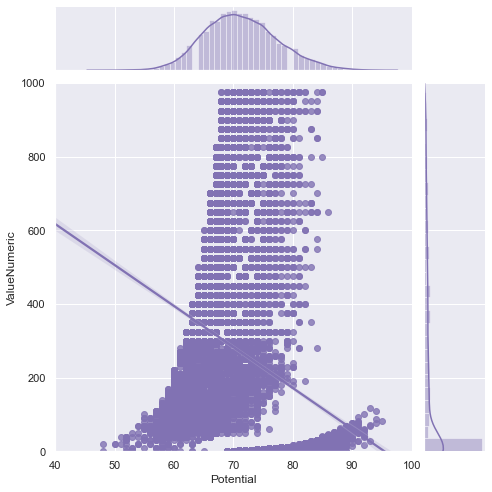

In [77]:
# Your code here:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

g = sns.jointplot("Potential","ValueNumeric",  data=fifa,
                  kind="reg", truncate=False,
                  xlim=(40, 100), ylim=(0, 1000),
                  color="m", height=7)

In [84]:
# No, we did see a linear regression, indeed, we see a cuadratic trend and two groups well defined.
# just to test... with potetial**2.. well.. I tr
from statsmodels.formula.api import ols

fifa['constant']=1
lm4 = ols('ValueNumeric ~ C(Position, Sum) + Potential**2 ',data=fifa).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     43.38
Date:                Thu, 30 Apr 2020   Prob (F-statistic):          4.63e-222
Time:                        00:43:20   Log-Likelihood:            -1.2646e+05
No. Observations:               17918   AIC:                         2.530e+05
Df Residuals:                   17890   BIC:                         2.532e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1051.3071     25.640     41.003      0.000    1001.050    1101.564
C(Position, Sum)[S.CAM]    15.3727     10.491      1.465      0.143      -5.192      35.937
C(Position, Sum)[S.CB]     41.6430      8.644      4.817      0.000      24.699      58.587
C(Position, Sum)[S.CDM]    44.5795     10.540      4.230      0.000      23.921      65.238
C(Position, Sum)[S.CF]     26.7441     31.984      0.836      0.403     -35.947      89.435
C(Position, Sum)[S.CM]     15.2041      9.282      1.638      0.101      -2.990      33.398
C(Position, Sum)[S.GK]    -28.5145      8.379     -3.403      0.001     -44.938     -12.091
C(Position, Sum)[S.LAM]  -135.4768     59.345     -2.283      0.022    -251.800     -19.154
C(Position, Sum)[S.LB]     36.9430      9.446      3.911      0.000      18.429      55.457
C(Position, Sum)[S.LCB]    19.6176     12.157      1.614      0.107      -4.210      43.446
C(Position, Sum)[S.LCM]     3.9050     14.872      0.263      0.793     -25.245      33.055
C(Position, Sum)[S.LDM]    29.1324     18.421      1.581      0.114      -6.975      65.239
C(Position, Sum)[S.LF]    -79.2500     70.142     -1.130      0.259    -216.735      58.235
C(Position, Sum)[S.LM]     25.7344     10.012      2.570      0.010       6.110      45.359
C(Position, Sum)[S.LS]     -9.5687     19.710     -0.485      0.627     -48.203      29.065
C(Position, Sum)[S.LW]     40.4776     15.126      2.676      0.007      10.830      70.126
C(Position, Sum)[S.LWB]    -3.4206     31.183     -0.110      0.913     -64.543      57.702
C(Position, Sum)[S.RAM]  -120.5701     59.346     -2.032      0.042    -236.894      -4.247
C(Position, Sum)[S.RB]     33.4585      9.533      3.510      0.000      14.773      52.144
C(Position, Sum)[S.RCB]    27.0033     12.047      2.241      0.025       3.390      50.617
C(Position, Sum)[S.RCM]     7.2350     14.903      0.485      0.627     -21.977      36.447
C(Position, Sum)[S.RDM]    -2.6858     18.183     -0.148      0.883     -38.326      32.954
C(Position, Sum)[S.RF]    -84.3264     67.923     -1.242      0.214    -217.461      48.809
C(Position, Sum)[S.RM]     21.8164      9.929      2.197      0.028       2.355      41.277
C(Position, Sum)[S.RS]      5.4591     19.932      0.274      0.784     -33.610      44.528
C(Position, Sum)[S.RW]     33.7360     15.286      2.207      0.027       3.774      63.698
C(Position, Sum)[S.RWB]    12.5544     29.590      0.424      0.671     -45.444      70.553
Potential                 -11.2489      0.346    -32.480      0.000     -11.928     -10.570
==============================================================================
Omnibus:                     2003.629   Durbin-Watson:                   1.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             272